<a href="https://colab.research.google.com/github/elPochini/LuigisMansion/blob/main/dccaras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import os
import face_recognition as fr
from PIL import Image
import pandas as pd
import csv
import random


In [ ]:
# # PREPROCESAMIENTO DE DATOS ##
# N = 48
# base_path = "images/train/"
# output_csv = "validation.csv"

# # Define the target number of images per emotion
# target_counts = {
#     'angry': 2820,
#     'disgust': 400,
#     'fear': 2500,
#     'happy': 4000,
#     'neutral': 3000,
#     'sad': 3500,
#     'surprise': 2000
# }

# # Open the CSV file for writing
# with open(output_csv, mode='w', newline='') as file:
#     writer = csv.writer(file)
#     # Write the header row
#     writer.writerow(["emotion"] + [f"pixel_{i}" for i in range(N * N)])

#     # Iterate through each emotion folder
#     for emotion, target_count in target_counts.items():
#         emotion_path = os.path.join(base_path, emotion)
#         image_names = os.listdir(emotion_path)

#         # Randomly sample the target number of images
#         sampled_images = random.sample(image_names, min(target_count, len(image_names)))

#         # Process each sampled image
#         for image_name in sampled_images:
#             image_path = os.path.join(emotion_path, image_name)

#             try:
#                 # Load the image and extract facial landmarks
#                 image = fr.load_image_file(image_path)
#                 face_landmarks_list = fr.face_landmarks(image)

#                 # Create a blank NxN binary image
#                 image_array = np.zeros((N, N), dtype=np.uint8)

#                 # Paint the pixels based on facial landmarks
#                 for landmarks in face_landmarks_list:
#                     for feature, points in landmarks.items():
#                         for (x, y) in points:
#                             if 0 <= x < N and 0 <= y < N:  # Ensure the coordinates are within bounds
#                                 image_array[y, x] = 1  # Paint the pixel white

#                 # Check if the image is all zeros
#                 if not np.any(image_array):
#                     print(f"Skipping {image_path}: Image is all zeros.")
#                     continue

#                 # Flatten the image array
#                 flattened_array = image_array.flatten()

#                 # Write the emotion and flattened array to the CSV
#                 writer.writerow([emotion] + flattened_array.tolist())

#             except Exception as e:
#                 print(f"Error processing {image_path}: {e}")

In [ ]:
# # PREPROCESAMIENTO DE DATOS ##
# N = 48
# base_path = "images/validation/"
# output_csv = "test.csv"

# # Define the target number of images per emotion (10% of original counts)
# target_counts = {
#     'happy': 312,
#     'neutral': 220,
#     'angry': 193,
#     'sad': 191,
#     'fear': 154,
#     'surprise': 148,
#     'disgust': 31
# }

# # Open the CSV file for writing
# with open(output_csv, mode='w', newline='') as file:
#     writer = csv.writer(file)
#     # Write the header row
#     writer.writerow(["emotion"] + [f"pixel_{i}" for i in range(N * N)])

#     # Iterate through each emotion folder
#     for emotion, target_count in target_counts.items():
#         emotion_path = os.path.join(base_path, emotion)
#         image_names = os.listdir(emotion_path)

#         # Randomly sample the target number of images
#         sampled_images = random.sample(image_names, min(target_count, len(image_names)))

#         # Process each sampled image
#         for image_name in sampled_images:
#             image_path = os.path.join(emotion_path, image_name)

#             try:
#                 # Load the image and extract facial landmarks
#                 image = fr.load_image_file(image_path)
#                 face_landmarks_list = fr.face_landmarks(image)

#                 # Create a blank NxN binary image
#                 image_array = np.zeros((N, N), dtype=np.uint8)

#                 # Paint the pixels based on facial landmarks
#                 for landmarks in face_landmarks_list:
#                     for feature, points in landmarks.items():
#                         for (x, y) in points:
#                             if 0 <= x < N and 0 <= y < N:  # Ensure the coordinates are within bounds
#                                 image_array[y, x] = 1  # Paint the pixel white

#                 # Check if the image is all zeros
#                 if not np.any(image_array):
#                     print(f"Skipping {image_path}: Image is all zeros.")
#                     continue

#                 # Flatten the image array
#                 flattened_array = image_array.flatten()

#                 # Write the emotion and flattened array to the CSV
#                 writer.writerow([emotion] + flattened_array.tolist())

#             except Exception as e:
#                 print(f"Error processing {image_path}: {e}")

## 2.1 Recopilación de Datos

#### a)

Bueno. Luego de harto rato tratando de hacer algo relativamente decente logré lo de arriba. Primero que todo saqué un nuevo dataset porque el que nos daban era demasiado pequeño, las imagenes en colores podrían llevar a problemas por el ruido que provocan estos, así que decidí trabajar con un [DATASET](https://www.kaggle.com/datasets/jonathanoheix/face-expression-recognition-dataset/data) de Kaggle diseñado para esto. Luego como es un dataset bien grande lo que hice fue bajar arbitrariamente la cantidad de imagenes para que no se demorase tanto, y finalmente quedamos con esta cantidad por cada. Para trabajar con csv, lo que hice fue calcular las landmarks de cada imagen y guardé los valores en 2304 columnas con valores binarios (podríamos reducir dimensiones para hacer computaciones menos costosas). Entonces solamente trabajaremos con el csv `facial_landmarks_reduced`. (Cabe destacar que usé Copilot para que me ayudase a este preproceso). Y también no añadí a mi csv los valores en donde no se detectaban features porque no iban a aportar absolutamente nada y quedé con 12507 imagenes.


#### b)

La cantidad de datos para cada clase está dada por la siguiente lista

* happy       3120
* neutral     2206
* angry       1933
* sad         1911
* fear        1545
* surprise    1481
* disgust      311

12507


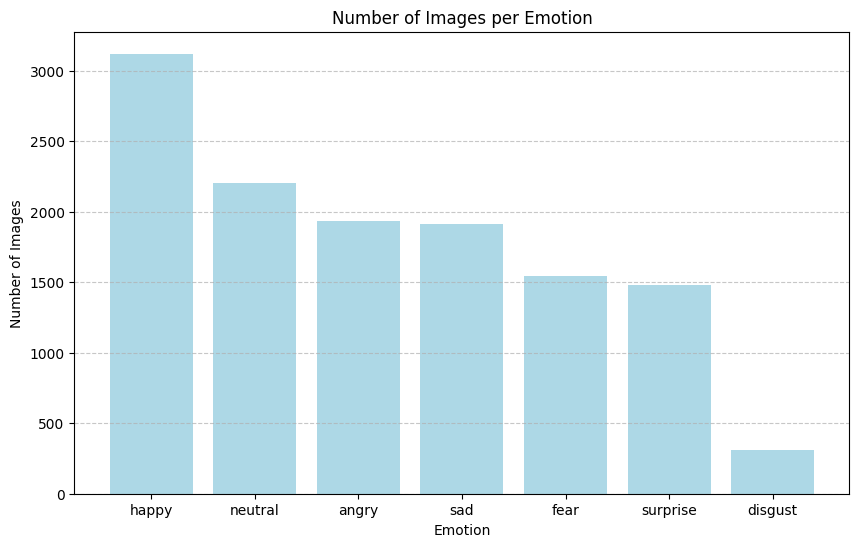

In [ ]:

data = pd.read_csv("validation.csv")


emotion_counts = data['emotion'].value_counts()
print(sum(emotion_counts))

plt.figure(figsize=(10, 6))
plt.bar(emotion_counts.index, emotion_counts.values, color='lightblue')

plt.xlabel('Emotion')
plt.ylabel('Number of Images')
plt.title('Number of Images per Emotion')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

#### c)

Las caracteristicas ya las obtuve y están guardadas en mi csv. Ahora te mostraré alguna visualización de cómo están guardadas.

neutral
[0 0 0 ... 0 0 0]
sad
[0 0 0 ... 0 0 0]
happy
[0 0 0 ... 0 0 0]


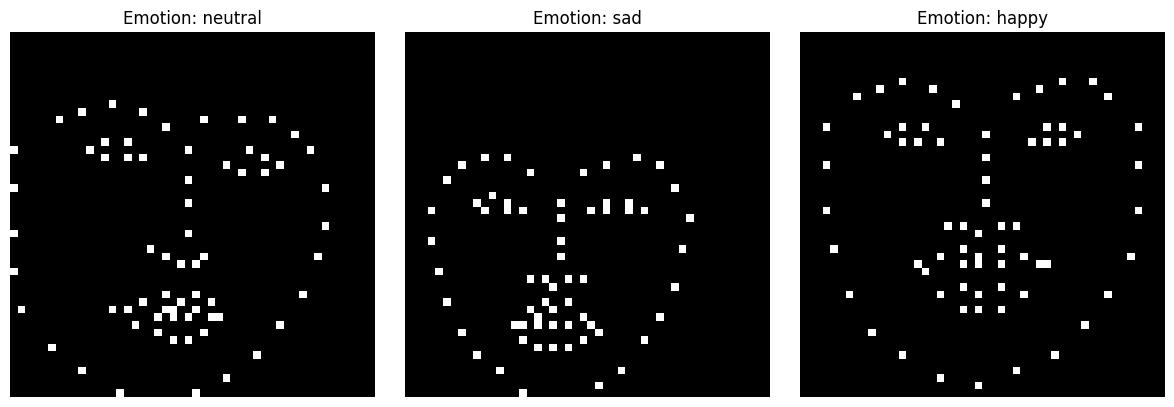

In [ ]:
csv_path = "validation.csv"
data = pd.read_csv(csv_path)

# Display 3 images from the CSV
plt.figure(figsize=(12, 4))
j = 0
for i in [8603, 9999, 6000]:

    emotion = data.iloc[i, 0]
    pixels = data.iloc[i, 1:].values.astype(int)
    print(emotion)
    print(pixels)

    image_array = np.array(pixels).reshape(48, 48)

    plt.subplot(1, 3, j + 1)
    plt.imshow(image_array, cmap="gray")
    plt.title(f"Emotion: {emotion}")
    plt.axis("off")
    j+=1

plt.tight_layout()
plt.show()

Siendo sincero no le tengo mucha fe al modelo que salga solamente de estás features pero sigamos.

#### d)

El dataset de Kaggle también tenía su set de testeo, así que para asegurar que todas las clases estuvieran representadas de forma proporcional en el conjunto de testeo, realicé una partición estratificada del 10% por clase. Esto permite evaluar el rendimiento del modelo de manera justa en cada emoción, respetando la distribución natural del dataset.

## 2.2 Implementación de algoritmos de ML

vamos a usar KNN y un árbol de decisiones

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

import pandas as pd
import numpy as np

train_csv_path = "validation.csv"
train_data = pd.read_csv(train_csv_path)

X_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values

test_csv_path = "test.csv"
test_data = pd.read_csv(test_csv_path)

X_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values


knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred_KNN = knn.predict(X_test)


### Árbol de Decisiones

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import numpy as np


train_csv_path = "validation.csv"
train_data = pd.read_csv(train_csv_path)


X_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values


test_csv_path = "test.csv"
test_data = pd.read_csv(test_csv_path)


X_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values

dt = DecisionTreeClassifier(random_state=42, max_depth=100)


dt.fit(X_train, y_train)

y_pred_tree = dt.predict(X_test)


## 2.3 Evaluación del Modelo

* Accuracy: indica el porcentaje de predicciones correctas que realizan los modelos sobre el total de predicciones.
* Precisión: mide que tan precisas son las predicciones correctas del modelo para cada clase. Es decir, de todas las veces que el modelo predice "happy" responde a ¿cuántas veces estaba en lo correcto?
* Recall: mide cuantos de los casos reales de un model logra identificar correctamente. Se relaciona con los **falsos negativos**
* F1-score: es la media que relaciona Precisión y Recall. Es útil para tener una visión más justa del desempeño.


### KNN

Vamos a ver el desempeño de mi modelo KNN.

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred_KNN))
print("\nClassification Report:\n", classification_report(y_test, y_pred_KNN))

Accuracy: 0.31685393258426964

Classification Report:
               precision    recall  f1-score   support

       angry       0.27      0.35      0.31       141
     disgust       0.15      0.35      0.21        23
        fear       0.24      0.23      0.24       101
       happy       0.55      0.38      0.45       248
     neutral       0.28      0.35      0.31       175
         sad       0.18      0.23      0.20        97
    surprise       0.49      0.22      0.30       105

    accuracy                           0.32       890
   macro avg       0.31      0.30      0.29       890
weighted avg       0.36      0.32      0.33       890



Tenemos una Accuracy del 31%, lo cual es ordinario. Esto sugiere que no estamos capturando bien la estructura de los datos. Notamos también desequilibrio en las clases, ya que las clases con más entradas como happy tienen mejor f1-score. Notamos un recall bajo en surprise y sad, por lo que el modelo no está detectando mucho de los casos reales de estas emociones. Traté de mejorar las metricas aplicando una reducción de dimensiones usando PCA conservando un 95% de la varianza, así como usar RandomOverSampler para que las clases minoritarias estén mejor representadas, pero bajé el Accuracy al 25%. 😅

### Decition Tree

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))

Accuracy: 0.31348314606741573

Classification Report:
               precision    recall  f1-score   support

       angry       0.26      0.27      0.26       141
     disgust       0.28      0.22      0.24        23
        fear       0.24      0.25      0.24       101
       happy       0.48      0.42      0.45       248
     neutral       0.34      0.32      0.33       175
         sad       0.12      0.18      0.14        97
    surprise       0.36      0.32      0.34       105

    accuracy                           0.31       890
   macro avg       0.30      0.28      0.29       890
weighted avg       0.33      0.31      0.32       890



Notamos que sufré al igual que mi otro modelo lo que da para pensar que tanto como el dataset como el enfoque que le dimos usando las features de la librería que nos dieron no son del todo óptimas. También intenté mejorar el rendimiento pero tampoco aportó mucho.

## 2.4 Predicción Final

Siendo sincero esto es caso perdido. El enfoque de solamente usar las features de la libería simplemente no fueron suficientes y pavimentaron un camino que solamente llegaría al fracaso. Es practicamente imposible llegar al 70% de accuracy solamente con lo que tengo hasta ahora. Por ahora me voy a acostar así que si no hay nada bajo la foto de mi perro esto entonces significa que me rendí 😪.

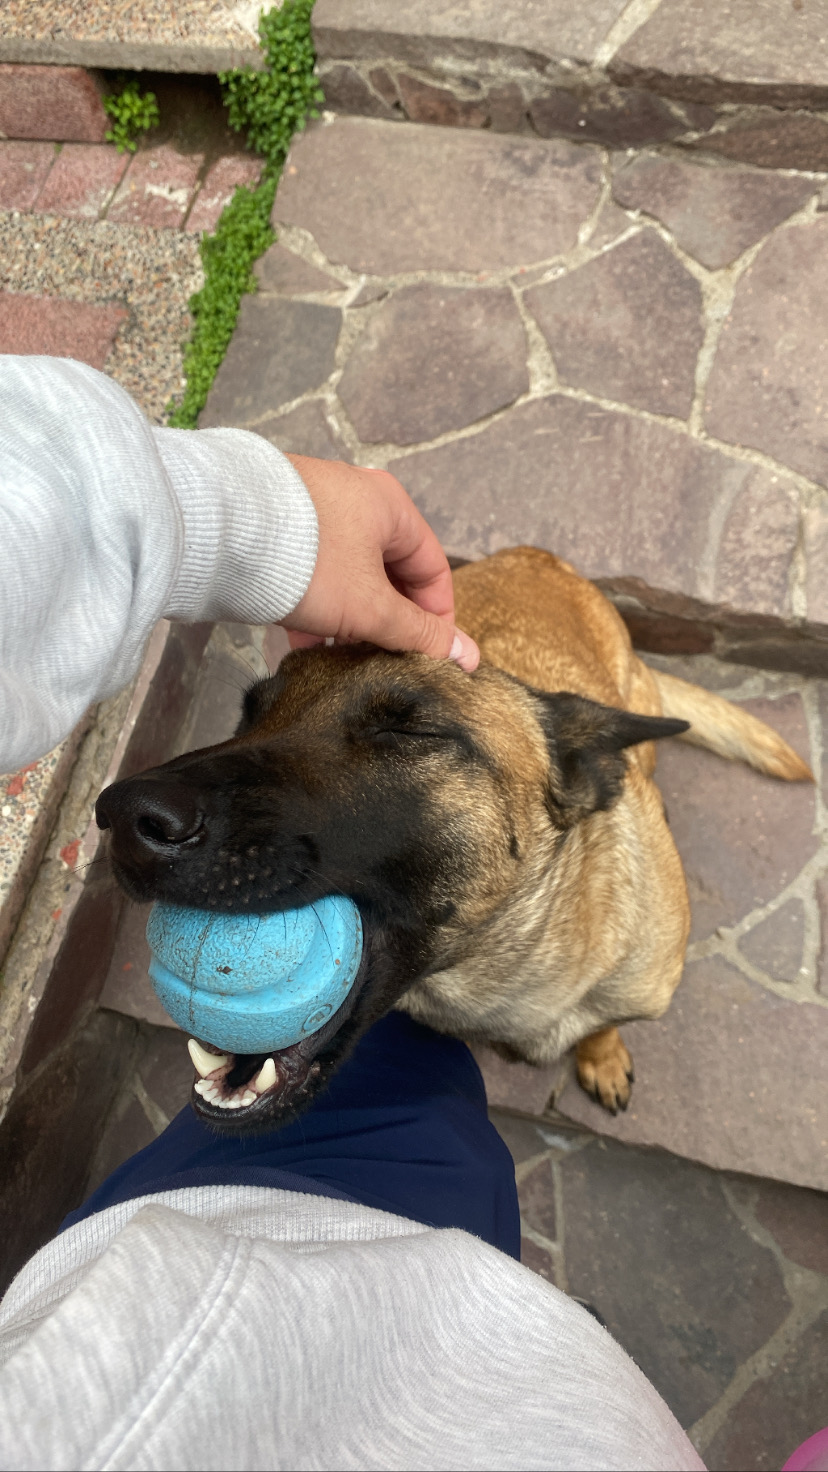